<a href="https://colab.research.google.com/github/andhikaaria/MachineLearning/blob/main/mgg2/Regresion_Data_Publik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
#Andhika Aria Pratama Nugraha
#1103202121
#Tugas ke mgg2
#menghubungkan dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
df = pd.read_csv('/content/drive/My Drive/Dataset/MALratings.csv')

df

,Title,Genres,Rank,Popularity,Score,Episodes,Episode length,Release Date
0,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Comedy,Suspense",13,404,8.99,12,23 min. per ep.,Spring 2022
1,3-gatsu no Lion 2nd Season,"Drama,Slice of Life",14,533,8.96,22,25 min. per ep.,Fall 2017
2,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,"Action,Comedy,Sci-Fi",19,939,8.93,1,1 hr. 50 min.,NaN
3,Gintama.,"Action,Comedy,Sci-Fi",12,735,8.99,12,24 min. per ep.,Winter 2017
4,Koe no Katachi,NaN,15,19,8.96,1,2 hr. 10 min.,NaN
...,...,...,...,...,...,...,...,...
20338,Steins;Gate,"Drama,Sci-Fi,Suspense",4,13,9.08,24,24 min. per ep.,Spring 2011
20339,High Score,"Comedy,Slice of Life",10527,6095,5.58,8,3 min. per ep.,Fall 2011
20340,Noraneko,NaN,8706,5064,6.04,1,35 sec.,NaN
20341,"Suki de Suki de, Suki de The Animation",NaN,/A,5329,6.81,2,27 min. per ep.,NaN


In [212]:
df.info

<bound method DataFrame.info of                                                    Title  \
0             Kaguya-sama wa Kokurasetai: Ultra Romantic   
1                             3-gatsu no Lion 2nd Season   
2      Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...   
3                                               Gintama.   
4                                         Koe no Katachi   
...                                                  ...   
20338                                        Steins;Gate   
20339                                         High Score   
20340                                           Noraneko   
20341             Suki de Suki de, Suki de The Animation   
20342                            Koihime†Musou OVA Omake   

                               Genres   Rank  Popularity  Score Episodes  \
0                     Comedy,Suspense     13         404   8.99       12   
1                 Drama,Slice of Life     14         533   8.96       22   
2                Ac

In [213]:
df.describe()

,Popularity,Score
count,20343.000000,14019.000000
mean,10174.477953,6.451633
std,5874.844237,0.905774
min,1.000000,1.840000
25%,5086.500000,5.830000
50%,10175.000000,6.460000
75%,15263.500000,7.110000
max,20349.000000,9.140000


In [214]:
# Hapus baris yang memiliki nilai null atau kosong di kolom "Content_Warning"
df_cleaned = df.dropna(subset=['Rank', 'Popularity', 'Score'])

# Mengonversi kolom "Rank" ke tipe data numerik dengan mengabaikan data yang tidak dapat diubah menjadi integer
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')


# Menghapus baris yang berisi NaN pada kolom "Rank"
df.dropna(subset=['Rank'], inplace=True)
df

,Title,Genres,Rank,Popularity,Score,Episodes,Episode length,Release Date
0,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Comedy,Suspense",13.0,404,8.99,12,23 min. per ep.,Spring 2022
1,3-gatsu no Lion 2nd Season,"Drama,Slice of Life",14.0,533,8.96,22,25 min. per ep.,Fall 2017
2,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,"Action,Comedy,Sci-Fi",19.0,939,8.93,1,1 hr. 50 min.,NaN
3,Gintama.,"Action,Comedy,Sci-Fi",12.0,735,8.99,12,24 min. per ep.,Winter 2017
4,Koe no Katachi,NaN,15.0,19,8.96,1,2 hr. 10 min.,NaN
...,...,...,...,...,...,...,...,...
20337,Senyoku no Sigrdrifa,NaN,6641.0,2959,6.44,12,24 min. per ep.,Fall 2020
20338,Steins;Gate,"Drama,Sci-Fi,Suspense",4.0,13,9.08,24,24 min. per ep.,Spring 2011
20339,High Score,"Comedy,Slice of Life",10527.0,6095,5.58,8,3 min. per ep.,Fall 2011
20340,Noraneko,NaN,8706.0,5064,6.04,1,35 sec.,NaN


In [224]:
# Memilih fitur (kolom) yang akan digunakan dalam model
# Memilih subset dari DataFrame df
X = df[['Rank', 'Popularity']]
y = df['Score']

df = df.dropna(subset=['Score'])  # Menghapus baris dengan NaN pada kolom 'Score'
y = df['Score']  # Mengambil variabel y setelah menghapus NaN


In [216]:
# Mengecek apakah terdapat data yang null atau tidak dikenal di dalam X
is_null_or_unknown = X.isnull().any().any()

# Menampilkan hasil pemeriksaan
if is_null_or_unknown:
    print("Terdapat data null atau tidak dikenal dalam X.")
else:
    print("Tidak terdapat data null atau tidak dikenal dalam X.")

# Mengecek apakah terdapat data yang null atau tidak dikenal di dalam y
is_null_or_unknown = y.isnull().any()

# Menampilkan hasil pemeriksaan
if is_null_or_unknown:
    print("Terdapat data null atau tidak dikenal dalam y.")
else:
    print("Tidak terdapat data null atau tidak dikenal dalam y.")

Tidak terdapat data null atau tidak dikenal dalam X.
Tidak terdapat data null atau tidak dikenal dalam y.


In [217]:
# Mengecek apakah terdapat string dalam X
contains_string = X.applymap(lambda x: isinstance(x, str)).any().any()

# Menampilkan hasil pemeriksaan
if contains_string:
    print("Terdapat string dalam X.")
else:
    print("Tidak terdapat string dalam X.")

# Mengecek apakah terdapat string dalam y
contains_string = y.apply(lambda x: isinstance(x, str)).any()

# Menampilkan hasil pemeriksaan
if contains_string:
    print("Terdapat string dalam y.")
else:
    print("Tidak terdapat string dalam y.")

Tidak terdapat string dalam X.
Tidak terdapat string dalam y.


In [218]:
# Mengidentifikasi elemen-elemen yang tidak dapat diubah menjadi float
X = X.applymap(lambda x: float(x) if str(x).replace(".", "", 1).isdigit() else None)

# Mengecek apakah terdapat string dalam X
contains_string = X.applymap(lambda x: isinstance(x, str)).any().any()

# Menampilkan hasil pemeriksaan
if contains_string:
    print("Terdapat string dalam X.")
else:
    print("Tidak terdapat string dalam X.")

Tidak terdapat string dalam X.


In [219]:
# Mengecek apakah terdapat NaN dalam X
contains_nan_X = X.isna().any().any()

# Mengecek apakah terdapat NaN dalam y
contains_nan_y = y.isna().any()

# Menampilkan hasil pemeriksaan
if contains_nan_X:
    print("Terdapat NaN dalam variabel X.")
else:
    print("Tidak terdapat NaN dalam variabel X.")

if contains_nan_y:
    print("Terdapat NaN dalam variabel y.")
else:
    print("Tidak terdapat NaN dalam variabel y.")

Tidak terdapat NaN dalam variabel X.
Tidak terdapat NaN dalam variabel y.


In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

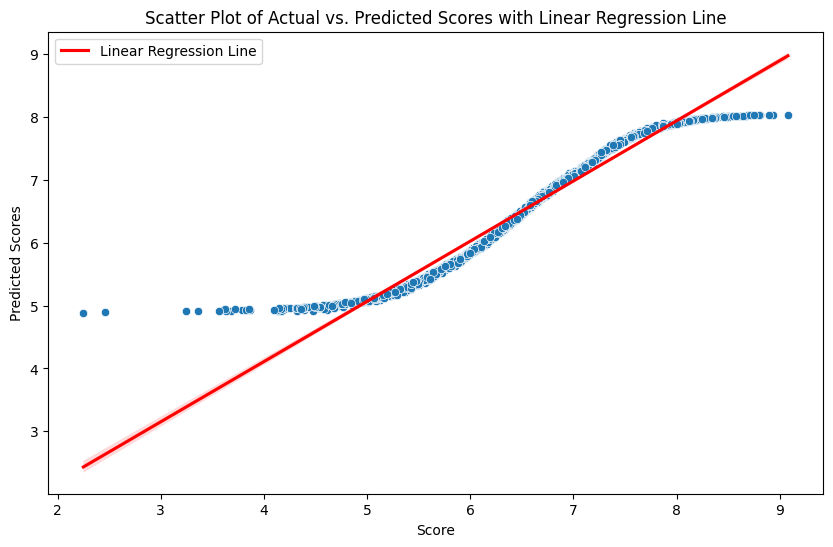

Mean Squared Error (MSE): 0.03763895885797092
R-squared (R2): 0.9544754132311075


In [225]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Membagi data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat model regresi linear
model = LinearRegression()

# Melatih model dengan data pelatihan
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Plot data asli dan garis regresi linear
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Scatter Plot of Actual vs. Predicted Scores with Linear Regression Line")
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', label='Linear Regression Line')
plt.legend()
plt.show()

# Mengukur performa model
mse = mean_squared_error(y_test, y_pred) #nilai Mean Squared Error
r2 = r2_score(y_test, y_pred) #nilai R-squared

# Menampilkan hasil
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


In [226]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

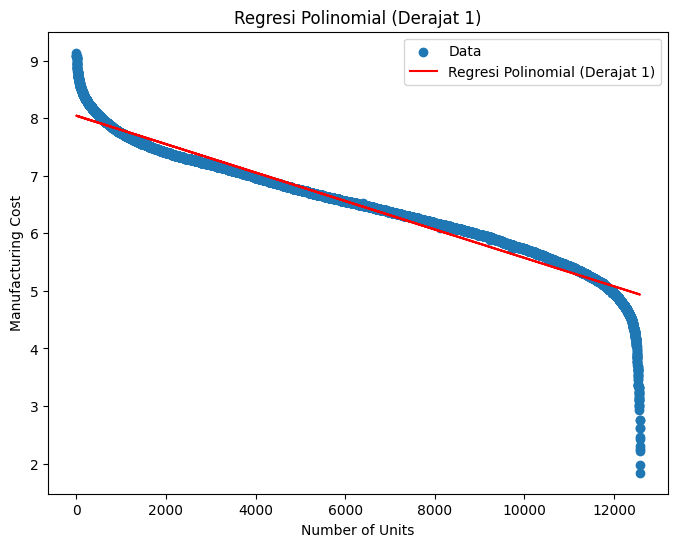

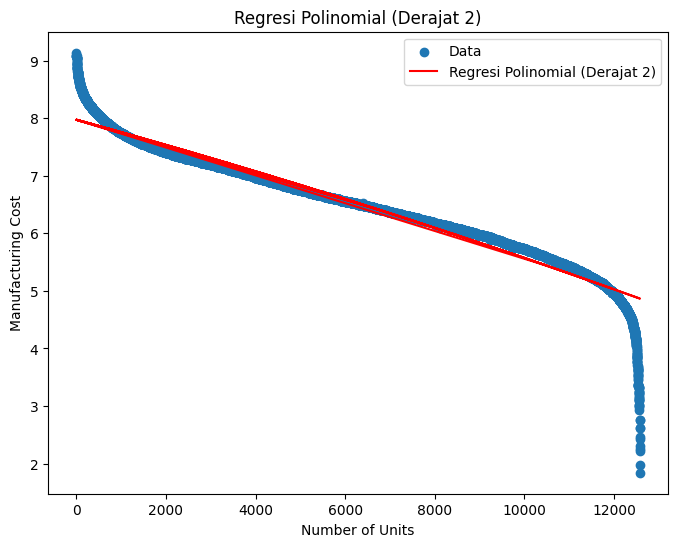

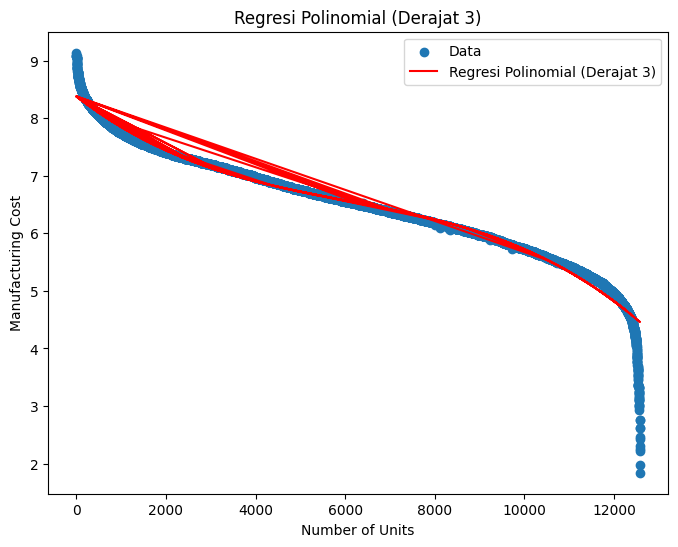

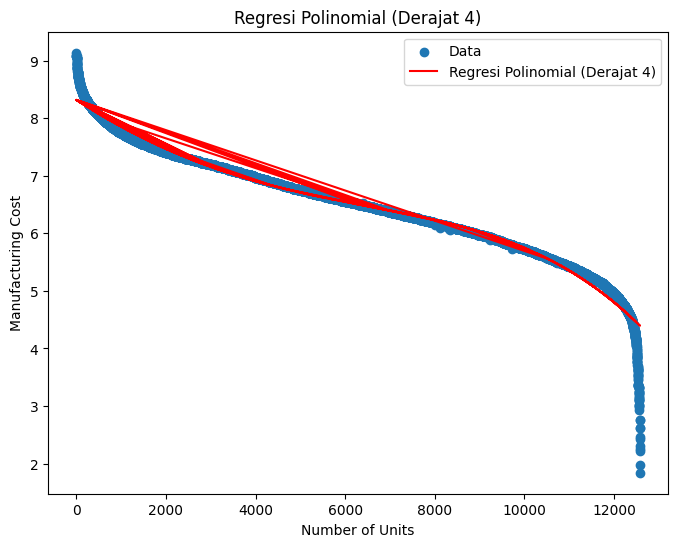

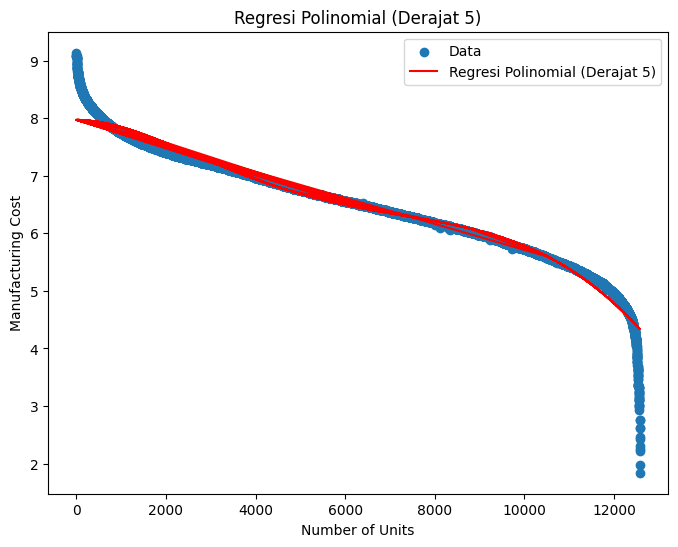

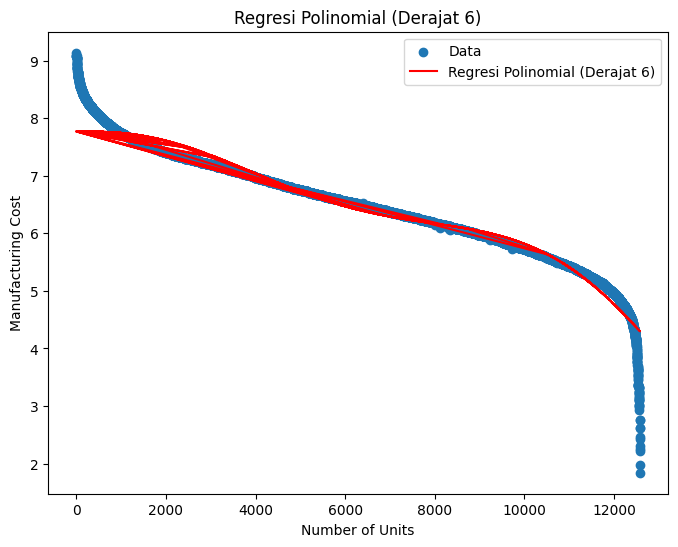

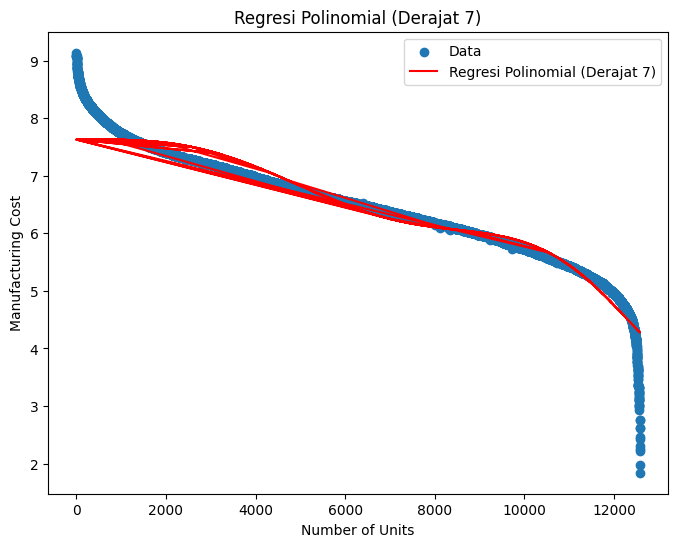

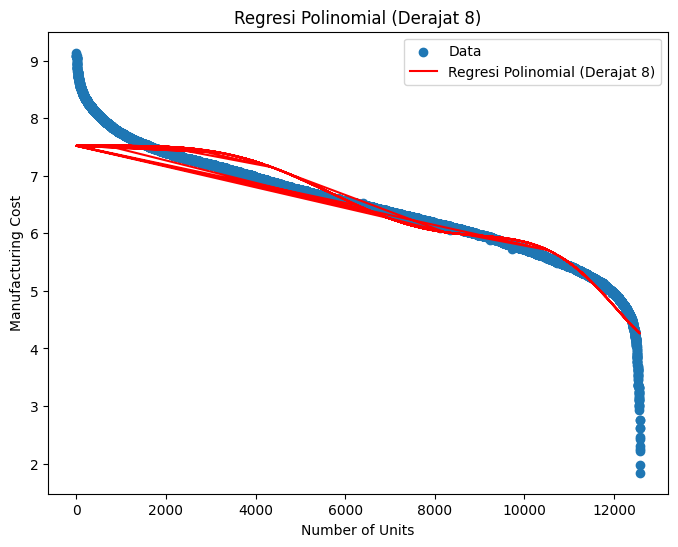

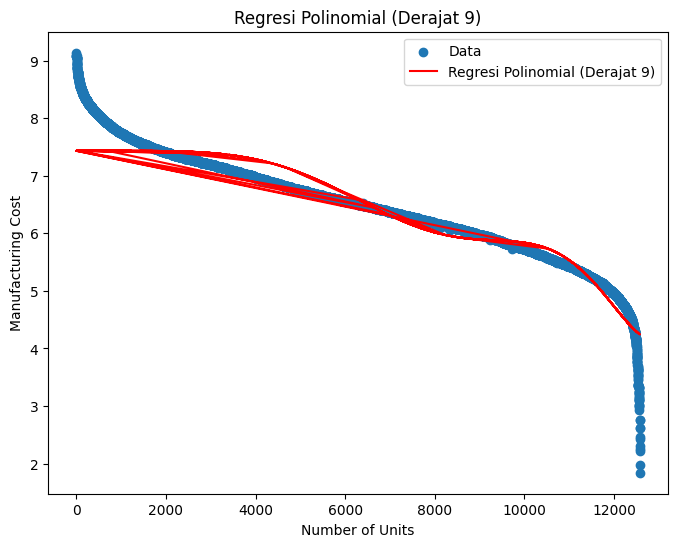

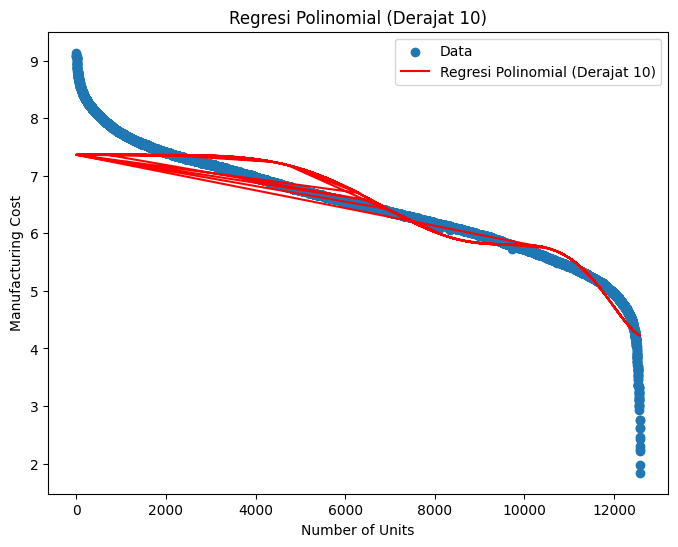

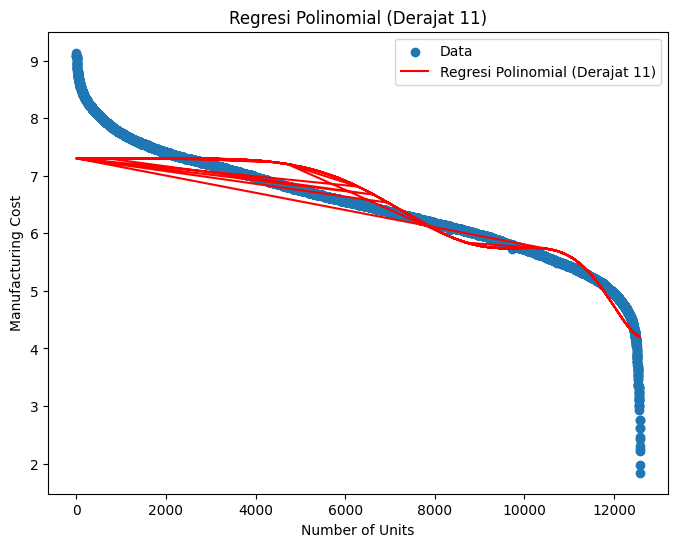

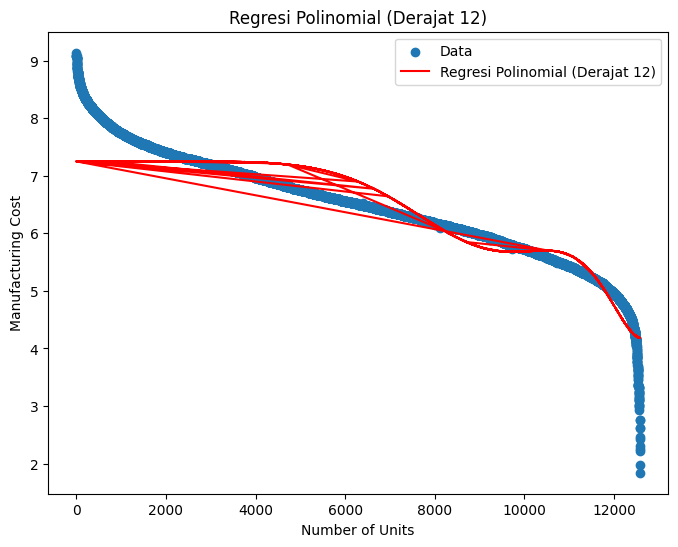

Derajat 1 MSE: 0.04
Derajat 2 MSE: 0.04
Derajat 3 MSE: 0.02
Derajat 4 MSE: 0.02
Derajat 5 MSE: 0.02
Derajat 6 MSE: 0.03
Derajat 7 MSE: 0.05
Derajat 8 MSE: 0.06
Derajat 9 MSE: 0.08
Derajat 10 MSE: 0.10
Derajat 11 MSE: 0.11
Derajat 12 MSE: 0.13


In [227]:
# Memilih subset dari DataFrame df sebagai variabel independen
X = df[['Rank']]
y = df['Score']

# Membuat array untuk menyimpan hasil MSE untuk setiap derajat polinomial
mse_values = []

# Mencoba derajat polinomial dari 1 hingga 8
for degree in range(1, 13):
    # Mengubah fitur menjadi bentuk polinomial
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Membuat model regresi linier
    model = LinearRegression()
    model.fit(X_poly, y)

    # Melakukan prediksi menggunakan model
    y_pred = model.predict(X_poly)

    # Menghitung Mean Squared Error (MSE)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Plot hasil regresi polinomial
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label='Data')
    plt.plot(X, y_pred, label='Regresi Polinomial (Derajat {})'.format(degree), color='red')
    plt.title('Regresi Polinomial (Derajat {})'.format(degree))
    plt.xlabel('Number of Units')
    plt.ylabel('Manufacturing Cost')
    plt.legend()
    plt.show()

# Menampilkan nilai MSE untuk setiap derajat polinomial
for degree, mse in enumerate(mse_values, start=1):
    print(f'Derajat {degree} MSE: {mse:.2f}')